# Szóbeágyazások - példák


A Bag-of-Words reprezentációnál láthattuk, hogy a "zsákba" pakoláskor elvesztettük a környezeti - kontextusbeli - információt és egymástól független szavakként kezeltük a szövegünket. A szóbeágyazások erre nyújtanak egy megoldást. Tanítás során a szavak környezetének felhasználásával rendel egy-egy, a szövegben előforduló szavakhoz egy sokdimenziós vektort.

Fontos, hogy a szavakhoz hozzárendelt vektoroknak a jelentést is kell hordozniuk. Vagyis a hasonló irányba mutató vektorok hasonló jelentést kell reprezentáljanak. Emellett több esetben vektorműveletekkel is ki tudunk fejezni jelentést

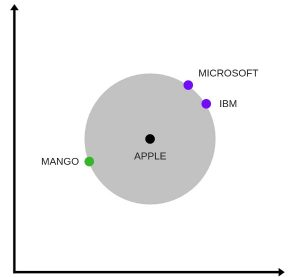

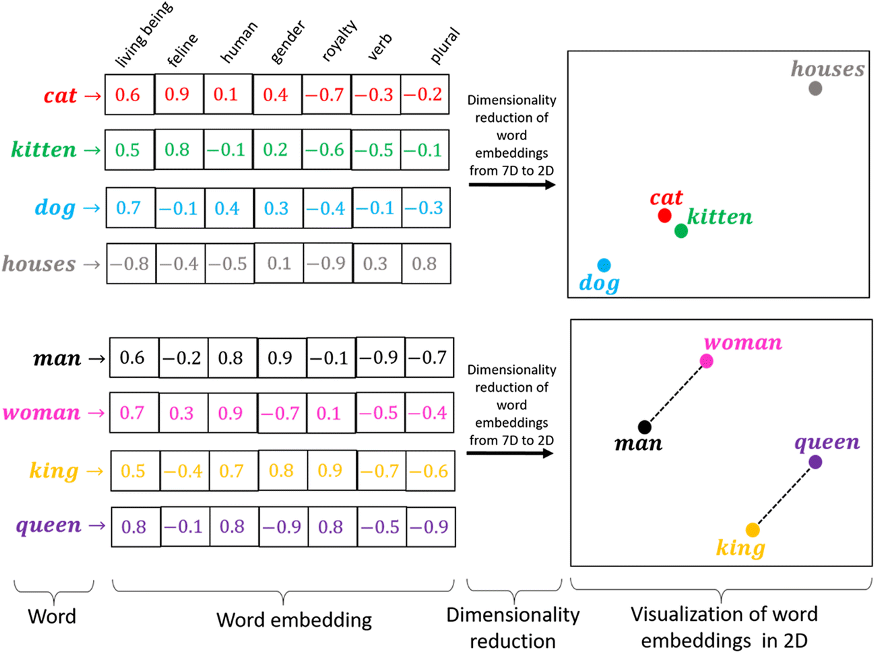

## Néhány kiemelt publikáció

Az első cikk a témában a Google csapata által készült. Ez volt a Word2Vec.

* Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781). arXiv preprint arXiv:1301.3781.

A Word2Vec egyik nagy fejlesztése a fastText, ez már nem csak a teljes szavakat tudja meg, hanem megadhatunk karakter n-gram tartományokat is, ezáltal jobban kezeli például magyarban a toldalékos szavakat.

* Bojanowski, P., Grave, E., Joulin, A., & Mikolov, T. (2017). [Enriching word vectors with subword information](https://arxiv.org/abs/1607.04606). Transactions of the association for computational linguistics, 5, 135-146.

A fastText egy tovább fejlesztése a floret 🌸, ami lehasheli a karakter n-gramokat, ezzel kisebb tárhelyet eredményezve.
* [floret: lightweight, robust word vectors](https://explosion.ai/blog/floret-vectors)


# Szóvektorok használata

Szerencsénkre vannak előre elkészített modellek, amiket letölthetünk és használhatunk. Ezek általában az általános szóhasználatra vannak kihegyezve, azonban amennyiben egy olyan domain belül dolgozunk, ahol sok szakszó van ott egy saját modell tanítása jobb eredményt adhat.

## spaCy és HuSpaCy

In [ ]:
!sudo apt-get install python3.7

!sudo apt-get update -y
!sudo update-alternatives --install /usr/bin/python3 python3
/usr/bin/python3.7 1
!sudo update-alternatives --config python3

In [ ]:
# a whatlies kicserél néhány csomag verziót, emiatt újra kell indítanunk majd a környezetet
!pip install whatlies[spacy]
!pip install umap-learn==0.5.2
!pip install floret

A `medium` és `large` spaCy modellek tartalmaznak szóvektorokat. [^1] Jelenleg még csak néhány nyelven érhető el floret modell, egyelőre a többi nyelven még Word2Vec vektor elérhető.

Egyes esetekben előfordulhat, hogy egy-egy szóhoz nincs társított vektor az előre tanított modellben. Ezeket OOV (out-of-vocabulary), szótáron kívüli szavaknak nevezzük.

[^1]: https://spacy.io/models#conventions

In [ ]:
import spacy

In [ ]:
# letöltjük a közepes méretű angol és nagy méretű HuSpaCy modellt
!python -m spacy download en_core_web_md
!pip install https://huggingface.co/huspacy/hu_core_news_lg/resolve/main/hu_core_news_lg-any-py3-none-any.whl

Nézzük meg a különböző szavakat hogyan rendezi el a vektortérben ez a módszer. Az adatvizualizációhoz a [whatlies](https://github.com/koaning/whatlies) csomagot fogjuk használni.

In [ ]:
from whatlies import EmbeddingSet
from whatlies.language import SpacyLanguage
from whatlies.transformers import Pca, Umap, Tsne

In [ ]:
lang_en = SpacyLanguage("en_core_web_md")

In [ ]:
words_en = ["desk", "table", "chair", "banana", "orange", "green", "dog",
            "cat", "fox", "puppy", "monkey", "prince", "king", "queen",
            "princess", "man", "woman", "human", "football", "volleyball",
            "basketball", "handball", "tree", "bush", "flower", "running",
            "marathon", "cycling", "endurance", "ultra"]

In [ ]:
emb_en = lang_en[words_en]
pca_en = emb_en.transform(Pca(2)).plot_interactive(title="English: PCA")
tsne_en = emb_en.transform(Tsne(n_components=2, random_state=0, n_iter=10000, perplexity=2)).plot_interactive(title="English: t-SNE")
umap_en = emb_en.transform(Umap(2)).plot_interactive(title="English: UMAP")

3 dimenzióredukáló algoritmus outputját nézzük meg.

* PCA: Principal Component Analysis
* t-SNE: t-distributed Stochastic Neighbour Embedding
* UMAP: Uniform Manifold Approximation and Projection

Bővebben: [Dimensionality Reduction for Data Visualization: PCA vs TSNE vs UMAP vs LDA](https://towardsdatascience.com/dimensionality-reduction-for-data-visualization-pca-vs-tsne-vs-umap-be4aa7b1cb29)

In [ ]:
pca_en | tsne_en | umap_en

Vajon magyarra működik-e?
Igen! A HuSpaCy is tartalmaz szóvektorokat. A `lg` modellben egy 300 dimenziós floret vektor található.

In [ ]:
lang_hu = SpacyLanguage("hu_core_news_lg")

In [ ]:
words_hu = ['macska', 'kutya', 'béka', 'dinoszaurusz', 'kecske',
         'autó', 'busz', 'bicikli', 'hajó', 'kerékpár',
         'férfi','nő', 'fiú', 'lány', 'herceg', 'hercegnő',
         'király', 'királynő', 'doktor', 'nővér', 'színész', 'színésznő', 'felnőtt', "mentőautó", "villamos", "fő"]

In [ ]:
emb_hu = lang_hu[words_hu]
pca_hu = emb_hu.transform(Pca(2)).plot_interactive(title="Hungarian: PCA")
tsne_hu = emb_hu.transform(Tsne(n_components=2, random_state=0, n_iter=10000, perplexity=2)).plot_interactive(title="Hungarian: t-SNE")
umap_hu = emb_hu.transform(Umap(2)).plot_interactive(title="Hungarian: UMAP")

In [ ]:
pca_hu | tsne_hu | umap_hu

Vegyünk fel újabb szavakat és kísérletezzünk más témájú szavakkal is!

*A kiegészített szólistával egy teljesen más plotot kapunk, de ez a 2d-be való leképezésnek köszönhető. A vektorok nem változnak.*

### Vektorok
Nézzük meg egy szóra milyen vektort kaphatunk!

In [ ]:
nlp_hu = spacy.load("hu_core_news_lg")

In [ ]:
word = nlp_hu("szék")
print(word.vector.shape)
word.vector

#### Milyen vektort kapunk egy szótáron kívüli szóra?

In [ ]:
nlp_en = spacy.load("en_core_web_md")

In [ ]:
word = nlp_hu('jghfhgfhfhfjhfhf')
print(word.vector.shape)
print(word[0].is_oov)
word.vector

(300,)
False


array([-4.1095557 ,  3.1899097 ,  0.31984055, -0.07722931,  1.17734   ,
       -0.19102713,  0.4068919 , -0.6858951 , -2.1270158 ,  0.77865857,
       -0.7416291 ,  0.5010874 , -1.183158  , -2.7233753 ,  1.2388122 ,
        0.16228373,  2.1143212 , -0.01302529,  2.497493  , -0.20776531,
        1.1653011 , -3.3429925 , -1.0658184 , -2.3187964 ,  1.1978886 ,
       -1.5741293 , -0.57707727, -3.88285   ,  2.3854375 ,  3.6109476 ,
        1.9205577 ,  1.6329252 ,  1.8179593 ,  0.15677872, -0.88382006,
       -1.1760886 , -1.8880273 ,  1.5978118 ,  0.45521802, -3.91599   ,
       -0.48323876,  1.0642625 ,  1.4639575 ,  0.13293266,  0.9951873 ,
        0.19894071, -0.00918041, -2.5915225 ,  0.49577707, -2.600096  ,
       -0.293939  ,  0.9329815 ,  1.2825141 ,  0.6113268 , -0.22329903,
        1.1116855 ,  1.2749184 , -0.11033733,  3.2790642 , -1.763545  ,
        0.37764725, -1.0653011 , -1.0371612 ,  0.14691956, -2.2229626 ,
       -0.23288998,  1.2620368 ,  0.27448225,  2.1071858 ,  0.19

***

### Leghasonlóbb szavak

In [ ]:
import numpy as np

In [ ]:
def most_similar(word, top_n=5):
    ms = nlp_en.vocab.vectors.most_similar(
        np.asarray([nlp_en.vocab.vectors[nlp_en.vocab.strings[word]]]), n=top_n
    )
    words = [nlp_en.vocab.strings[w] for w in ms[0][0]]
    return words

In [ ]:
most_similar("ajax", top_n=10)

['koryū',
 'Ewerthon',
 'ASPX',
 'MatLab',
 'WPMU',
 'IFCSun',
 'javaScript',
 'RxJava',
 'Gebser',
 'Debuggers']

# Szóvektor modell tanítása

Tanítsunk saját szóbeágyazási modellt egy szakszövegen! Jelen esetben egy StackOverflow posztokból kivonatolt korpuszt használunk.

## Gensim - Word2Vec

In [ ]:
from gensim.models import word2vec
import csv
import random
import pandas as pd
pd.options.display.max_colwidth = 200

import multiprocessing
cores = multiprocessing.cpu_count()
print ('Calculations will be running on {} CPU cores'.format(cores))

# Functions
def recursive_len(item):
    '''Counts the total nr of elements in a list of lists'''
    if type(item) == list:
        return sum(recursive_len(subitem) for subitem in item)
    else:
        return 1

Calculations will be running on 2 CPU cores


### Korpusz beolvasása

* A korpuszt lezárt Stack Overflow kérdésekből állították össze.
* Csak a kérdések címei szerepelnek
* A címek a következő előfeldolgozási lépéseken estek át:
    * tokenizálás
    * normalizálás: spec karakterek, számok és írásjelek törlése
* `LineSentence` formátum: 1 mondat (SO kérdés címe) soronként

In [ ]:
## Read CSV from url
import csv, urllib.request

url = "https://raw.githubusercontent.com/rfarkas/student_data/main/SO_texts/SO_corpus_lines.csv"
response = urllib.request.urlopen(url)
lines = [l.decode('utf-8') for l in response.readlines()] # response is in bytes that has to be decoded to string encoding
reader = csv.reader(lines)
SO_corpus = list(reader)

### Alapvető információk a korpuszról

In [ ]:
# Some basic info about corpus:
print('Lines in corpus:', len(SO_corpus))
print('Full size of corpus, i.e., total number of words:', recursive_len(SO_corpus))
print('Type:', type(SO_corpus))
print('A few random example lines:')
for j in range(5):
    i = random.randint(0, len(SO_corpus))
    print ('Line:', i, ':', SO_corpus[i])

Lines in corpus: 202310
Full size of corpus, i.e., total number of words: 1110964
Type: <class 'list'>
A few random example lines:
Line: 191210 : ['php', 'finding', 'existing', 'data', 'mysql']
Line: 175569 : ['find', 'largest', 'sorted', 'subset']
Line: 98621 : ['write', 'program', 'prompt', 'number', 'days', 'add', 'current', 'date', 'print', 'new', 'date', 'well', 'today', 'date']
Line: 77356 : ['create', 'variables', 'javascript', 'loop']
Line: 134077 : ['python', 'sort', 'list', 'nested', 'tuple', 'asc', 'order', 'desc', 'order']


## Gensim - Word2Vec modell építése CBOW módszerrel

A tanítás egy rejtett réteggel történik, figyelembe veszi a környezetet és a tanult háló rejtett rétegét használja fel szóvektorként. Két fő fajtája:

**CBOW:** A környezet alapján tippeljük meg mi a köztes szó. Bemenet egy adott méretű környezet (pl. 2-2 szó előtte és utána), tanulandó a közöttük levő szó.

**SKIP-GRAM:** Adott szó alapján tippeljük meg a környezet szavait. Bemenet egy szó, tanulandó a környezete pl. 2-2 szó előtte és utána.

Bemenet és kimenet kódolása:

* Bemenet one-hot encodinggal: teljes szótár méretének megfelelő vektor, ahol a bemeneti szónak megfelelő pozícióban 1 szerepel, minden más pozícióban 0.

* Kimenet valószínűségekkel: szótár méretű vektor, a legnagyobb érték mutatja a háló által tippelt szó pozícióját.


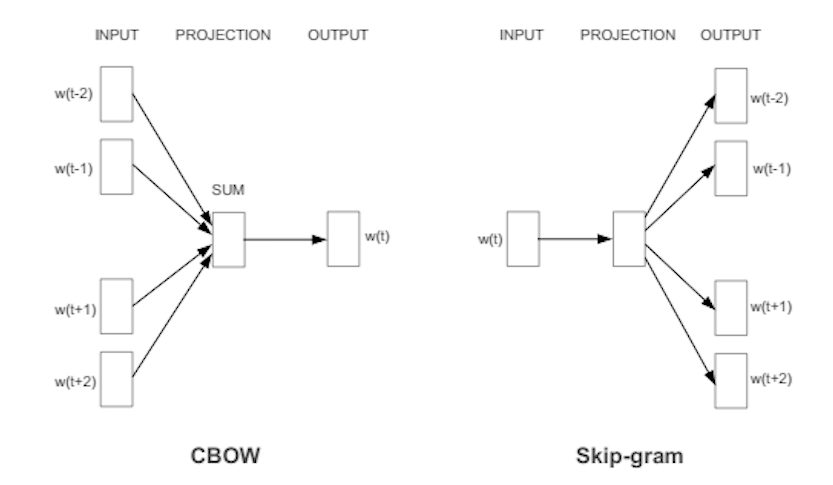

### Skip-gram leírás
https://towardsdatascience.com/skip-gram-nlp-context-words-prediction-algorithm-5bbf34f84e0c

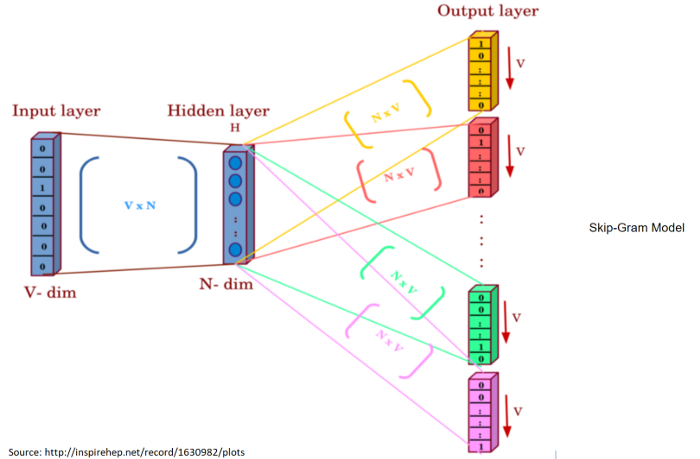

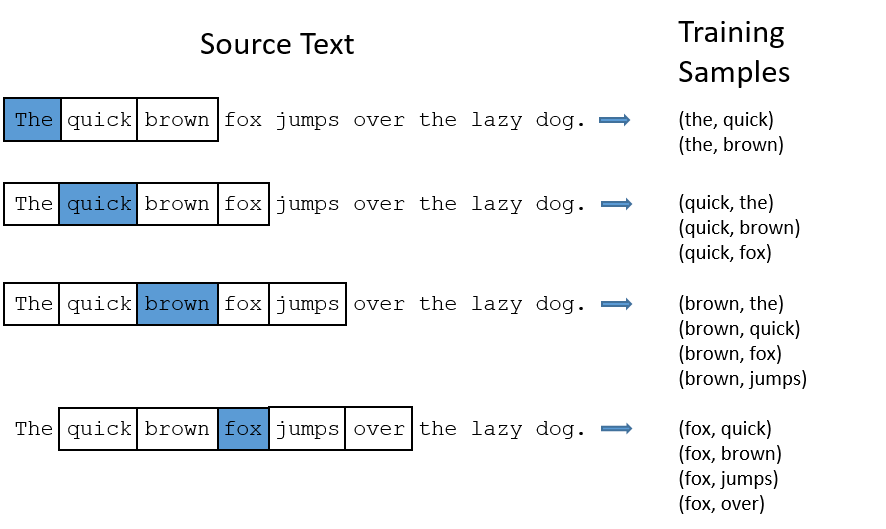

Részletek: https://laptrinhx.com/word2vec-skip-gram-model-part-1-intuition-3000555102/

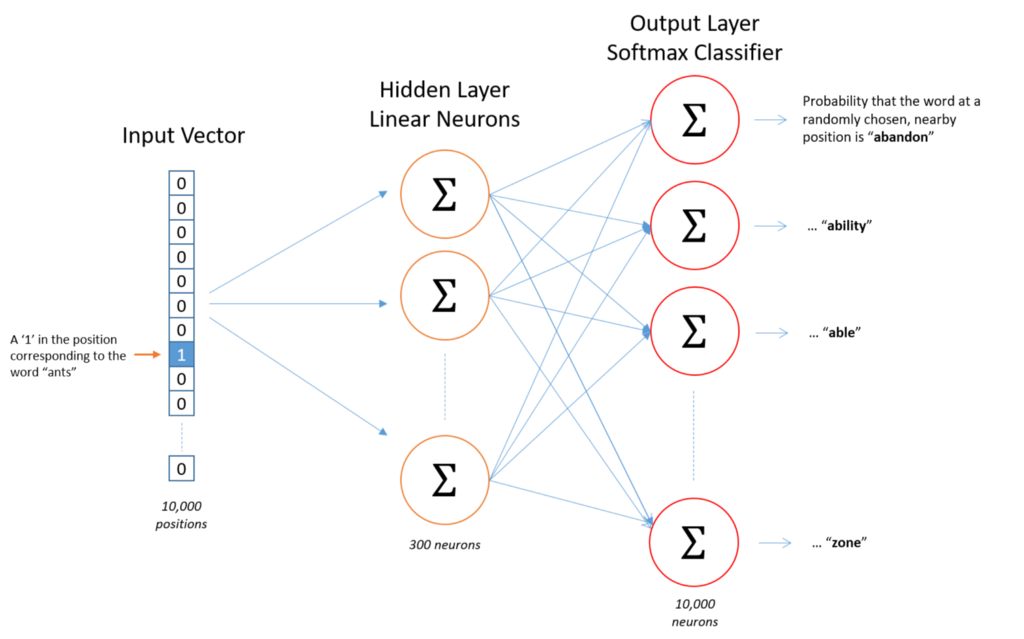

In [ ]:
%%time
# Set values for various training parameters

# reference Google line:
#./word2vec -train corpus_1line.csv -output vectors_cbow.bin -cbow 1 -size 200 -window 8 -negative 25 -hs 0 -sample 1e-4 -threads 12 -binary 1 -iter 15 -alpha 0.025

feature_size = 200    # Word vector dimensionality
window_context = 8    # Context window size
min_word_count = 5    # Minimum word count to filter frequently occured words
sample = 1e-4         # Downsample setting for frequent words
skipgram = 0          # 0 for CBOW, 1 for skip-gram
negative = 25         # value for negative sampling
hs = 0                # ({0, 1}, optional) – If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.
niter = 15

w2v_model = word2vec.Word2Vec(SO_corpus,
                              size=feature_size,
                              sg=skipgram,
                              negative=negative,
                              hs=hs,
                              window=window_context,
                              min_count=min_word_count,
                              sample=sample,
                              iter=niter,
                              workers=cores)

CPU times: user 1min 27s, sys: 248 ms, total: 1min 27s
Wall time: 49 s


A modell tulajdonságai:

In [ ]:
print(w2v_model)

Word2Vec(vocab=8057, size=200, alpha=0.025)


### Példák hasonlóságokra: néhány szó és a hozzá 10 leghasonlóbb a korpuszból.

In [ ]:
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=10)]
                  for search_term in ['array', 'loop', 'javascript', 'python', 'digit', 'website', 'recursion','data', 'table', 'ajax']}


res_gensim = pd.DataFrame(similar_words)
res_gensim

,array,loop,javascript,python,digit,website,recursion,data,table,ajax
0,multidimensional,iteration,jquery,dict,digits,site,recursive,databse,rows,success
1,arrays,loops,js,comprehension,upto,websites,iterative,datas,row,getjson
2,associative,iterations,vanilla,haskell,numbers,viewing,factorial,rows,tables,post
3,indexes,foreach,attr,perl,number,pages,depth,retrieved,column,callback
4,ints,looping,onchange,shorter,zeros,sites,fibonacci,information,pivot,synchronous
5,dimensional,continue,innerhtml,slicing,decimal,friendly,tail,retrive,columns,axios
6,sorted,infinite,dom,loops,sequences,homepage,quicksort,values,records,request
7,nsmutablearray,met,addclass,mixed,four,webpage,backtracking,pivot,inserted,posting
8,dimension,statement,settimeout,walk,alphabets,redirects,maze,summary,alter,jsonp
9,pairs,increments,ajax,def,consecutive,seo,summation,filed,databse,response


### Egy példa vektor

In [ ]:
w2v_model.wv.get_vector('loop')

array([-0.3861106 ,  0.4093216 , -0.44088393,  0.4827329 ,  0.25209707,
        0.40982953, -0.9239233 ,  0.4796296 ,  0.09274025, -0.37077785,
        0.83928144, -0.21695161, -0.07240176,  0.34771815, -0.47099906,
       -0.16535574,  0.16642907,  0.01148569,  0.7549731 ,  0.42918235,
       -0.49051106,  0.70601696,  0.543697  ,  0.14212587,  0.15269135,
       -0.43290684, -0.37580505, -0.2536491 ,  0.29591507, -0.15968047,
       -0.7322282 ,  0.4268537 ,  0.36836433,  0.731798  ,  0.03866825,
       -0.85255426,  0.19318035,  0.25047088,  0.29517013, -0.58865976,
       -0.3175041 ,  0.602802  ,  0.20322604, -0.07940267, -0.06694106,
       -0.3897336 ,  0.1684396 ,  0.42528287, -0.15798281,  0.02520602,
       -0.44635177,  0.17306778, -0.37013954,  0.5568012 ,  0.16079777,
        0.10836309, -0.17315623,  0.04504088,  0.44451258,  0.7052999 ,
       -0.3103831 , -0.53586346,  0.17978986, -0.13660188,  0.05653469,
       -0.6962787 , -0.09302288,  0.10971555, -0.6486187 , -0.48

Vizualizáljuk a DataFrameben megjelent szavakat!

In [ ]:
from whatlies.language import GensimLanguage

In [ ]:
w2v_model.wv.save("word2vec.kv")

In [ ]:
lang_w2v = GensimLanguage("word2vec.kv")

In [ ]:
words_w2v = set()
for column in res_gensim:
    for word in res_gensim[column]:
        words_w2v.add(word)

In [ ]:
emb_w2v = lang_w2v[list(words_w2v)[:40]]
pca_w2v = emb_w2v.transform(Pca(2)).plot_interactive(title="Word2Vec: PCA")
tsne_w2v = emb_w2v.transform(Tsne(n_components=2, random_state=0, n_iter=10000, perplexity=3)).plot_interactive(title="Word2Vec: t-SNE")
umap_w2v = emb_w2v.transform(Umap(2)).plot_interactive(title="Word2Vec: UMAP")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
pca_w2v | tsne_w2v | umap_w2v

alt.HConcatChart(...)

## Floret

https://github.com/explosion/floret/tree/main/python, https://fasttext.cc/docs/en/unsupervised-tutorial.html

### Floret modell építése CBOW módszerrel

In [ ]:
import floret

In [ ]:
!wget https://raw.githubusercontent.com/rfarkas/student_data/main/SO_texts/SO_corpus_lines.csv

--2022-10-03 14:37:02--  https://raw.githubusercontent.com/rfarkas/student_data/main/SO_texts/SO_corpus_lines.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7859158 (7.5M) [text/plain]
Saving to: ‘SO_corpus_lines.csv’

SO_corpus_lines.csv 100%[===================>]   7.49M  --.-KB/s    in 0.02s   

2022-10-03 14:37:02 (308 MB/s) - ‘SO_corpus_lines.csv’ saved [7859158/7859158]



In [ ]:
!sed -i -e 's/,/ /g' SO_corpus_lines.csv

In [ ]:
%%time
floret_model = floret.train_unsupervised("SO_corpus_lines.csv",
                                         model="cbow",
                                         mode="floret",
                                         dim=200,
                                         hashCount=2,
                                         bucket=50000,
                                         neg=25,
                                         minn=4,
                                         maxn=5,
                                         thread=cores)

CPU times: user 1min 31s, sys: 348 ms, total: 1min 31s
Wall time: 52.7 s


In [ ]:
floret_model.save_model("floret.bin")
floret_model.save_vectors("floret.vec")
floret_model.save_floret_vectors("floret.floret")

### Példák hasonlóságokra: néhány szó és a hozzá 10 leghasonlóbb a korpuszból.

In [ ]:
similar_words = {search_term: [item[1] for item in floret_model.get_nearest_neighbors(search_term, k=10)]
                  for search_term in ['array', 'loop', 'javascript', 'python', 'digit', 'website', 'recursion', 'data', 'table', 'ajax']}

res_floret = pd.DataFrame(similar_words)
res_floret

,array,loop,javascript,python,digit,website,recursion,data,table,ajax
0,subarray,looped,javascripts,ipython,digits,site,recursively,datas,tableau,ch
1,nsarray,loops,javasscript,pythons,digital,websites,recursive,databse,tablets,post
2,arraypush,forloop,ecmascript,jython,isdigit,sites,logarithm,datarow,datatable,succes
3,arrray,loopback,noscript,ironpython,numbers,scrapy,haskell,dataset,jtable,postman
4,toarray,met,jscript,pythonic,number,scraper,fibonacci,cdata,tablet,onsubmit
5,arrays,foreach,wscript,haskell,numbered,blog,maze,datastore,vtable,echoed
6,inarray,infinite,jqueryui,uc,hyphen,webpages,exercise,datatables,tables,httppost
7,subarrays,infinitely,cshtml,tuples,nsdecimalnumber,scrape,eratosthenes,datasets,stable,dopost
8,arraylist,iteratively,vbscript,pythagorean,vowel,scraped,arithmetics,datatable,datatables,jquery
9,arrary,forever,superscript,dict,vowels,webrtc,reverses,jsondata,colums,xquery


### Egy példa vektor

In [ ]:
floret_model.get_word_vector("loop")

array([ 0.2228907 ,  0.7946545 , -0.7785288 , -0.1860115 , -0.58424634,
       -0.03105536, -0.01257601, -1.2111914 ,  0.13359396,  1.50177   ,
        0.7798364 ,  0.66603583,  0.5544069 ,  0.80320495, -0.47500372,
        0.29392767, -0.46009737, -0.72260255,  0.36499724, -0.499865  ,
        0.3074089 ,  0.15718961, -0.19065557, -0.19690685,  0.00948363,
        0.08704027,  0.5146264 , -0.03415979, -0.59213823, -0.0711343 ,
        0.6272825 ,  0.10093516, -0.04383641, -0.21011256, -0.28371406,
        0.10386379, -1.0282581 ,  0.04099396,  0.6460249 ,  0.12472223,
        0.17692022, -0.4691323 ,  0.2695865 , -0.53066057,  0.1468904 ,
        0.3736359 ,  0.4848113 , -0.4308333 , -0.51567686,  0.3399751 ,
       -0.20257568,  0.11495373, -0.20247261, -0.12784731, -0.04716933,
       -0.43597782,  0.4634418 , -0.00701348,  0.16866802,  1.0074339 ,
       -1.0376731 ,  0.64688504,  0.07391147,  0.11642917,  0.9041637 ,
        0.22406739, -0.61605537,  0.59918684,  0.47290978,  1.10

In [ ]:
from whatlies.language import FloretLanguage

In [ ]:
lang_floret = FloretLanguage("floret.bin")

In [ ]:
words_floret = set()
for column in res_floret:
    for word in res_floret[column]:
        words_floret.add(word)

In [ ]:
emb_floret = lang_floret[list(words_floret)[:40]]
pca_floret = emb_floret.transform(Pca(2)).plot_interactive(title="Floret: PCA")
tsne_floret = emb_floret.transform(Tsne(n_components=2, random_state=0, n_iter=10000, perplexity=3)).plot_interactive(title="Floret: t-SNE")
umap_floret = emb_floret.transform(Umap(2)).plot_interactive(title="Floret: UMAP")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
pca_floret | tsne_floret | umap_floret

alt.HConcatChart(...)

# Szöveg-, dokumentumszintű beágyazási módszerek

A szavak szintje önmagában nagyon kevés információ tartalmaz. Esetenként szükségünk lehet további adatokra, ilyenkor szeretnénk nagyobb egységekre - például mondatokra vagy bekezdésekre - is egy-egy vektort előállítani.

Különböző ötletek jöhetnek ez esetben szóba:
 * A szövegben található szóvektorok közül válasszunk ki egy reprezentáns elemet
 * Átlagoljuk ki a szóvektorokat és ez az átlag legyen a szövegszintű vektorunk
 * Tanítsunk szövegszintű beágyazást


### Dokumentumszintű vektorok a spaCy esetén

Egyszerű megoldás: a szóvektorok átlaga.

Érezhető a módszer hátránya: a nyelvi finomságokat könnyen elveszíthetjük, például a szórenddel kifejezett kiemeléseket az átlag nem különbözteti meg mondat szinten.

Ennek ellenére egy gyakorlatban jól alkalmazható megoldás.

In [ ]:
# Defináljuk a Dokumentumunkat
doc = nlp_hu("biciklivel megyek boltba")

# Megkeressük a szavak vektorait
wv = []
for tk in doc:
    wv.append(tk.vector)

dv_1 = doc.vector # spaCy dokumentum vektor
dv_2 = np.mean([wv[0], wv[1], wv[2]], axis=0) # numpy-val kiszámítjuk a szóvektorok átlagát

# Megnézzük, hogy a különbség 0-e, ha igen, akkor bizonyítottuk, hogy a spaCy is így számol dokumentum vektort
all(v == 0 for v in dv_1 - dv_2)

True

In [ ]:
doc1 = nlp_hu("biciklivel megyek boltba")
doc2 = nlp_hu("boltba megyek biciklivel")
print('Dokumentumok hasonlósága:', doc1.similarity(doc2))

Dokumentumok hasonlósága: 0.9999999838767297


## Tanulás alapú megoldások

### Bert és egyéb Transformer-hálók
- Léteznek már magyar nyelvre is dokumentszintű reprezentáló előtanított modellek, ilyen a [huBERT](https://huggingface.co/SZTAKI-HLT/hubert-base-cc) is, amit például a HuSpaCy [`hu_core_news_trf`](https://huggingface.co/huspacy/hu_core_news_trf) modellje használ is. Ezzel rendkívűl pontos előfeldolgozó rendszereket lehet finomhangolni, hátránya persze a nagyon sok millió paraméternek köszönhetően, hogy lassú, ami sok esetben hátrány, de alkalmazás válogatja. Aki szeretne mélyebben megismerkedni ezen neuronhálókkal és még sok egyébbel, azoknak ajánljuk Berend Gábor óráját a [Számítógépes szemantikát](https://github.com/begab/compsem/).

### Doc2Vec
- És ahogyan szó volt, léteznek jóval egyszerűbb megoldások is, mint a Doc2Vec.


# Dokumentumosztályozás szóbeágyazásra építve

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.callbacks import CallbackAny2Vec
import tensorflow as tf
import multiprocessing
import numpy as np
import os

## Töltsük le az IMDB reviews adathalmazt

A `train_reviews` és `test_reviews` ndarray objektumok, melyek integer-eket tartalmazó listákból állnak. 25000 ilyen listát találhatunk mindkét objektumban. Egy-egy integer-eket tartalmazó lista egy-egy review. Az integer-ek egyedi azonosítók, melyek a szavakat kódolják. A `train_labels` és `test_labels` szintén ndarray objektumok, melyek a review-k címkéit tartalmazzák. Minden egyes review-t pozitív (1) vagy negatív (0) kategóriába sorolunk.

In [ ]:
imdb = tf.keras.datasets.imdb
(train_reviews, train_labels), (test_reviews, test_labels) = imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
train_reviews[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [ ]:
train_labels[0]

1

Készítsük el az szavakat reprezentáló integer-ek dekódolásához a szótárunkat. Ehhez használni tudjuk az imdb objektum `get_word_index()` metódusát, ami egy dictionary-t ad vissza, melyben a szavak string alakja a kulcs, az integer alakja pedig az érték. A dictionary elejéhez hozzáadunk néhány tag-et.

In [ ]:
vocab = imdb.get_word_index()
vocab = {k:(v + 3) for k, v in vocab.items()}
vocab["<PAD>"] = 0
vocab["<START>"] = 1
vocab["<UNK>"] = 2
vocab["<UNUSED>"] = 3

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
vocab["brilliant"]

530

Készítsünk inverz szótárat, amelyben a szavak integer alakja a kulcs, a string alakja pedig az érték.

In [ ]:
vocab_inv = dict([(value, key) for (key, value) in vocab.items()])

In [ ]:
vocab_inv[530]

'brilliant'

Definiáljunk egy `decode_review()` metódust, mely a review-k integer reprezentációját string reprezentációvá alakítja.

In [ ]:
def decode_review(review):
    return [vocab_inv.get(i, "?") for i in review]

In [ ]:
decode_review(train_reviews[0])

['<START>',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'a

## Doc2Vec dokumentumbeágyazások létrehozása

A dokumentumvektorok elkészítéséhez a `gensim` csomagot fogjuk használni. Alakítsuk a review-kat `TaggedDocument` objektumokká.

In [ ]:
reviews = np.concatenate((train_reviews, test_reviews))
docs = [TaggedDocument(decode_review(review), [i]) for i, review in enumerate(reviews)]

In [ ]:
class Doc2VecCallback(CallbackAny2Vec):
    def __init__(self, epochs):
        self.prog_bar = tf.keras.utils.Progbar(epochs)
        self.epoch = 0
    def on_epoch_end(self, model):
        self.epoch += 1
        self.prog_bar.update(self.epoch)

A `Doc2Vec` osztály elkészíti a review-k dokumentum vektorait.

In [ ]:
d2v_model = Doc2Vec(docs, dm=0, min_count=2, vector_size=100, hs=0, negative=5, epochs=5,
                    callbacks=[Doc2VecCallback(5)], sample=0, workers=multiprocessing.cpu_count())

5/5 [==============================] - 95s 14s/step


In [ ]:
# fname = '/content/d2v_model'
# d2v_model = Doc2Vec.load(fname)  # you can continue training with the loaded model!

Nyerjük ki a modellből a `train_reviews` és `test_reviews` adataink vektoros reprezentációit.

In [ ]:
embdgs = d2v_model.docvecs.vectors_docs
train_embdgs, test_embdgs = np.split(embdgs, [25000])

In [ ]:
train_embdgs[0]

array([-0.24159326, -0.24941528, -0.43892878,  0.30782226,  0.45255616,
        0.5445375 , -0.38585466, -0.17927004,  0.2966895 , -0.13939692,
       -0.21958691,  0.11043315,  0.33587632,  0.04160499,  0.05666969,
       -0.11517979,  0.04468729,  0.02281974,  0.00538097, -0.42739967,
       -0.30153316, -0.02270299,  0.07702403, -0.34087852, -0.18863091,
       -0.23131618,  0.3502344 ,  0.23814516, -0.26711714,  0.11568332,
       -0.2798352 , -0.3142171 ,  0.39779833, -0.07004049, -0.12060645,
        0.09272354,  0.06169692, -0.33197963,  0.0662294 , -0.02924125,
        0.2476473 , -0.35671294,  0.20814937, -0.09106084,  0.08900285,
        0.05150426, -0.21911125, -0.22321859, -0.07127758,  0.13070178,
        0.25553742,  0.34774053,  0.20639506, -0.19359751, -0.18692909,
       -0.28596526,  0.23073614,  0.3084202 , -0.12808841,  0.03207438,
       -0.07370815,  0.10519106,  0.0074346 ,  0.16086107,  0.09415054,
       -0.05896917, -0.15083098,  0.05697434, -0.1493279 ,  0.03

## Osztályozás Doc2Vec beágyazások alapján

Hozzunk létre egy egyszerű neuronhálót.

In [ ]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_1.compile(optimizer=tf.compat.v1.train.AdamOptimizer(0.01), loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_1.fit(train_embdgs, train_labels, batch_size=64, epochs=50, shuffle=True)

Epoch 1/50
391/391 [==============================] - 1s 2ms/step - loss: 0.4105 - accuracy: 0.8288
Epoch 2/50
391/391 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8526
Epoch 3/50
391/391 [==============================] - 1s 3ms/step - loss: 0.3391 - accuracy: 0.8514
Epoch 4/50
391/391 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8542
Epoch 5/50
391/391 [==============================] - 1s 1ms/step - loss: 0.3356 - accuracy: 0.8546
Epoch 6/50
391/391 [==============================] - 1s 1ms/step - loss: 0.3344 - accuracy: 0.8550
Epoch 7/50
391/391 [==============================] - 1s 1ms/step - loss: 0.3339 - accuracy: 0.8532
Epoch 8/50
391/391 [==============================] - 1s 1ms/step - loss: 0.3336 - accuracy: 0.8550
Epoch 9/50
391/391 [==============================] - 1s 1ms/step - loss: 0.3334 - accuracy: 0.8553
Epoch 10/50
391/391 [==============================] - 1s 1ms/step - loss: 0.3334 - accuracy: 0.8538

In [ ]:
model_1.evaluate(test_embdgs, test_labels)

782/782 [==============================] - 1s 1ms/step - loss: 0.3285 - accuracy: 0.8574


[0.32845184206962585, 0.8574000000953674]

Hozzunk létre egy fokkal összetettebb neuronhálót.

In [ ]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(50, activation="relu", input_shape=(100, )))
model_2.add(tf.keras.layers.Dropout(0.3))
model_2.add(tf.keras.layers.Dense(50, activation="relu"))
model_2.add(tf.keras.layers.Dropout(0.2))
model_2.add(tf.keras.layers.Dense(50, activation="relu"))
model_2.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_2.compile(optimizer=tf.compat.v1.train.AdamOptimizer(0.01), loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_2.fit(train_embdgs, train_labels, batch_size=64, epochs=50, shuffle=True)

Epoch 1/50
391/391 [==============================] - 1s 2ms/step - loss: 0.3764 - accuracy: 0.8364
Epoch 2/50
391/391 [==============================] - 1s 2ms/step - loss: 0.3529 - accuracy: 0.8493
Epoch 3/50
391/391 [==============================] - 1s 2ms/step - loss: 0.3464 - accuracy: 0.8500
Epoch 4/50
391/391 [==============================] - 1s 2ms/step - loss: 0.3423 - accuracy: 0.8545
Epoch 5/50
391/391 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.8540
Epoch 6/50
391/391 [==============================] - 1s 2ms/step - loss: 0.3417 - accuracy: 0.8507
Epoch 7/50
391/391 [==============================] - 1s 2ms/step - loss: 0.3400 - accuracy: 0.8524
Epoch 8/50
391/391 [==============================] - 1s 3ms/step - loss: 0.3378 - accuracy: 0.8547
Epoch 9/50
391/391 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8570
Epoch 10/50
391/391 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8549

In [ ]:
model_2.evaluate(test_embdgs, test_labels)

782/782 [==============================] - 1s 1ms/step - loss: 0.3505 - accuracy: 0.8443


[0.35046759247779846, 0.8442800045013428]

## Példa Keras kód CBOW beágyazás tanításához

In [ ]:
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Lambda, dot, Input, Reshape
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 200)           2000000   
                                                                 
 lambda (Lambda)             (None, 200)               0         
                                                                 
 dense (Dense)               (None, 10000)             2010000   
                                                                 
Total params: 4,010,000
Trainable params: 4,010,000
Non-trainable params: 0
_________________________________________________________________
None


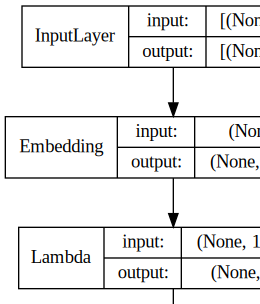

In [ ]:
# example CBOW architecture in Keras

vocab=np.zeros(10000)

vocab_size=len(vocab)
embed_size=200
window_size=8

cbow = Sequential()

cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))

cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())

# visualize model structure

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False,
                 rankdir='TB').create(prog='dot', format='svg'))

## Olvasnivaló
Skip-gram módszer részletes elemzése: https://aegis4048.github.io/demystifying_neural_network_in_skip_gram_language_modeling

# Feladatok
* Írassuk ki a tévesztési mátrixot
* Dokumentumosztályozás elvégzése a múlt órai módszerek egyikével és az eredmények összehasonlítása
